## Tutorial 4: Sampling and Interpolation



Today, we'll be focusing on sampling on 2-D lattices and how to perform interpolation when we require finer sampling. Later, we will understand the problem of mosaicing. And we'll see a few methods to do demosaicing. Finally, we will look at sampling in different lattices such as the case of MR imaging and see the kind of problems arise there.

Agenda:
- 1D and 2D sampling
- 1D and 2D aliasing artifacts
- Nyquist sampling rate
- Image resampling
- Polyphase resampling
- Sampling vs quantization in cameras
- Color filter arrays, image demosaicing
- MRI sampling, aliasing

## 1D sampling 



In [2]:
import numpy as np
from scipy.fftpack import fft, ifft
import cv2
import scipy
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from math import tan, radians
import sys
import warnings

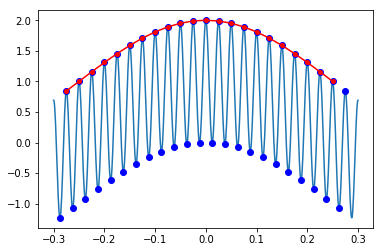

In [3]:
from numpy import linspace,cos,pi,ceil,floor,arange
from pylab import plot,show,axis

# sampling a signal badlimited to 40 Hz 
# with a sampling rate of 800 Hz
f = 40;  # Hz
tmin = -0.3;
tmax = 0.3;
t = linspace(tmin, tmax, 800);
x = cos(2*pi*t) + cos(2*pi*f*t); # signal sampling
plot(t, x)

# sampling the signal with a sampling rate of 80 Hz
# in this case, we are using the Nyquist rate.
T = 1/80.0;
nmin = ceil(tmin / T);
nmax = floor(tmax / T);
n = arange(nmin,nmax);
#print(n)
x1 = cos(2*pi*n*T) + cos(2*pi*f*n*T);
plot(n*T, x1, 'bo')

# sampling the signal with a sampling rate of 35 Hz
# note that 35 Hz is under the Nyquist rate.
T = 1/40.0;
nmin = ceil(tmin / T);
nmax = floor(tmax / T);
n = arange(nmin,nmax);
#print(n)
x2 = cos(2*pi*n*T) + cos(2*pi*f*n*T);
plot(n*T, x2, '-r.',markersize=8)

#axis([-0.3, 0.3, -1.5, 2.3])
show()

## Nyquist's sampling theorem

The Nyquist sampling theorem says that 
 
 
"A bandlimited continuous-time signal can be sampled and perfectly reconstructed from its samples if the waveform is sampled over twice as fast as it's highest frequency component."


## 2D Sampling

Concurrent lines show the effect of aliasing on downsampling

See 2D-Aliasing-Demo.ipynb

## Decimation



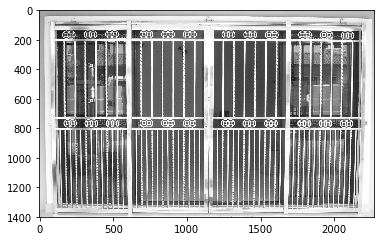

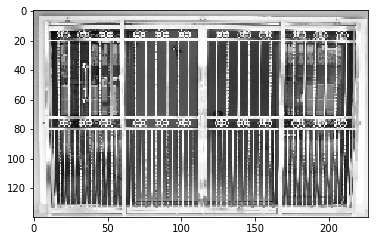

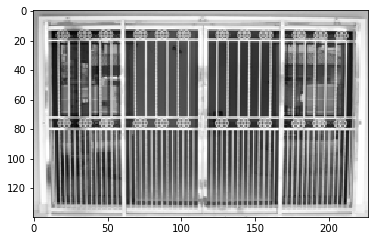

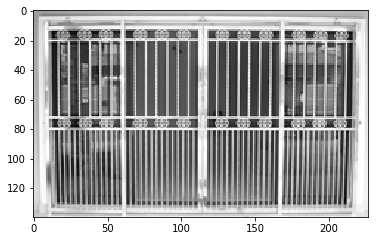

In [4]:
## imresize downsampling
warnings.filterwarnings('ignore')

import cv2
import matplotlib.pyplot as plt
from scipy.misc import imresize
windows_img = cv2.imread('texture-windows.jpg',cv2.IMREAD_GRAYSCALE).astype(float)/255.0
plt.figure()
plt.imshow(windows_img, cmap='gray')
plt.show()

#print(windows_img.shape)
# resample with lesser sampling rate
nearest_undersampled_img = imresize(windows_img, 0.1, interp="nearest")
#print(undersampled_img.shape)
plt.figure()
plt.imshow(nearest_undersampled_img, cmap='gray')
plt.show()

bicubic_undersampled_img = imresize(windows_img, 0.1, interp="bicubic")
#print(undersampled_img.shape)
plt.figure()
plt.imshow(bicubic_undersampled_img, cmap='gray')
plt.show()

lanczos_undersampled_img = imresize(windows_img, 0.1, interp="lanczos")
#print(undersampled_img.shape)
plt.figure()
plt.imshow(lanczos_undersampled_img, cmap='gray')
plt.show()

## Interpolation

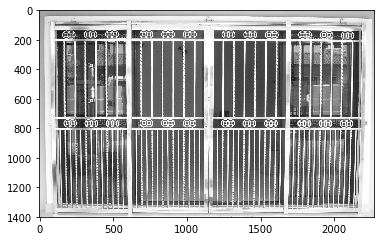

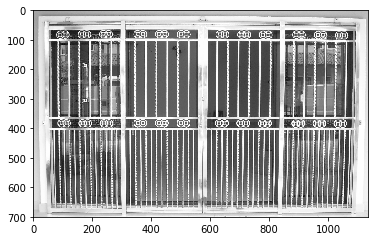

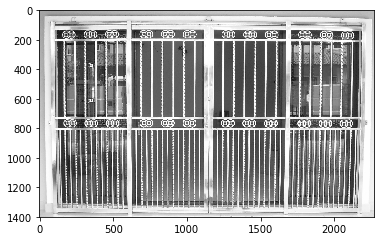

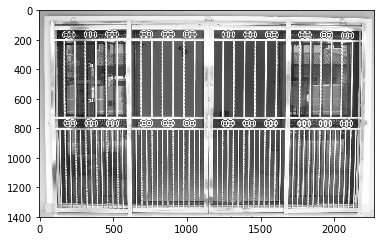

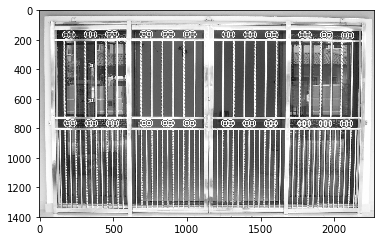

In [5]:
## imresize downsampling
warnings.filterwarnings('ignore')

import cv2
import matplotlib.pyplot as plt
from scipy.misc import imresize
windows_img = cv2.imread('texture-windows.jpg',cv2.IMREAD_GRAYSCALE).astype(float)/255.0
windows_img_low_res = imresize(windows_img, 0.5, interp="nearest")

plt.figure()
plt.imshow(windows_img, cmap='gray')
plt.show()

plt.figure()
plt.imshow(windows_img_low_res, cmap='gray')
plt.show()

#print(windows_img.shape)
# resample with lesser sampling rate
nearest_undersampled_img = imresize(windows_img_low_res, 2.0, interp="nearest")
#print(undersampled_img.shape)
plt.figure()
plt.imshow(nearest_undersampled_img, cmap='gray')
plt.show()

bicubic_undersampled_img = imresize(windows_img_low_res, 2.0, interp="bicubic")
#print(undersampled_img.shape)
plt.figure()
plt.imshow(bicubic_undersampled_img, cmap='gray')
plt.show()

lanczos_undersampled_img = imresize(windows_img_low_res, 2.0, interp="lanczos")
#print(undersampled_img.shape)
plt.figure()
plt.imshow(lanczos_undersampled_img, cmap='gray')
plt.show()

## Polyphase decimation/interpolation

Traditional decimator

<img src="decimator.png" width=480>

Efficient implementation of decimator

<img src="efficient-decimator.png" width=480>

Traditional upsampler

<img src="upsampler.png" width=480>

Efficient implementation of upsampler

<img src="efficient-upsampler.png" width=480>

Noble Identities

<img src="noble-identities.png" width=480>

Implementing polyphase using scipy: see Polyphase-demo.ipynb

## Sampling vs. Quantization

In the context of images, sampling basically means how finely does our sensor sample in the spatial dimension and quantization means how "sensitive" our sensor is to the light. 

### CCD and CMOS sensors

CCD: charge coupled device

CMOS: complementary metal oxide semiconductors

<img src="cmos-ccd-sensors.jpg">


## Color Filter Arrays

<img src="color-filter-array.jpg">


### Quanta Image Sensors


<img src="Quanta-Image-Sensor.png">

## Mosaicing, bilinear interpolation for demosaicing

See Demosaicing-demo.ipynb

## MR Imaging, aliasing artifacts

See MRI-Sampling.ipynb